In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Задание №1

In [26]:
hr = pd.read_csv('HR.csv')
print(hr.head())
hr.info()

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

# Задание №2

In [12]:
# Базовые статистика по количественным характеристикам
print('Уровень удовлетворенности работой')
print('Значение моды: ', hr['satisfaction_level'].round().mode()[0])
print(hr['satisfaction_level'].describe(), end = '\n\n')

print('Время с момента последней оценки в годах')
print('Значение моды: ', hr['last_evaluation'].round().mode()[0])
print(hr['last_evaluation'].describe(), end = '\n\n')

print('Количество проектов, выполненных за время работы')
print('Значение моды: ', hr['number_project'].round().mode()[0])
print(hr['number_project'].describe(), end = '\n\n')

print('Среднее количество часов на рабочем месте в месяц')
print('Значение моды: ', hr['average_montly_hours'].round().mode()[0])
print(hr['average_montly_hours'].describe(), end = '\n\n')

print('Стаж работы в компании в годах')
print('Значение моды: ', hr['time_spend_company'].round().mode()[0])
print(hr['time_spend_company'].describe(), end = '\n\n')

Уровень удовлетворенности работой
Значение моды:  1.0
count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

Время с момента последней оценки в годах
Значение моды:  1.0
count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

Количество проектов, выполненных за время работы
Значение моды:  4
count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

Среднее количество часов на рабочем месте в месяц
Значение моды:  135
count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        15

# Задание №3

In [30]:
hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


In [31]:
hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']].corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


In [32]:
hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']].corr(method='kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842
number_project,0.022077,0.266267,1.000000,0.306987,0.195025
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000


<AxesSubplot:>

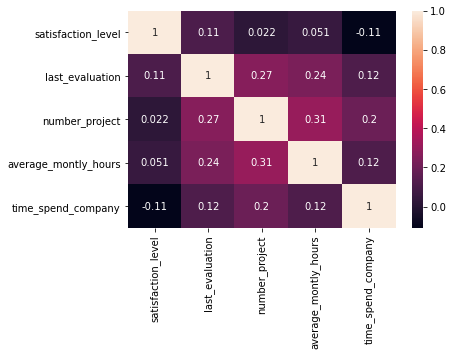

In [34]:
sns.heatmap(hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']].corr(), annot= True)

<AxesSubplot:>

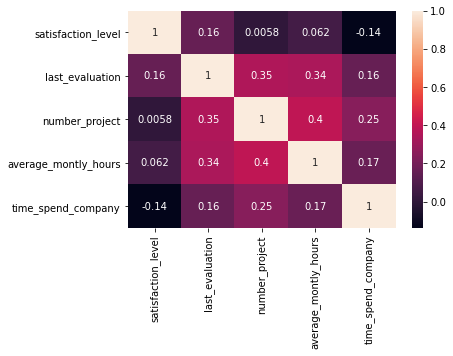

In [46]:
sns.heatmap(hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']].corr(method='spearman'), annot= True)

<AxesSubplot:>

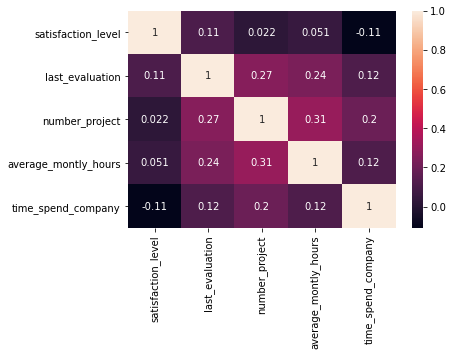

In [47]:
sns.heatmap(hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']].corr(method='kendall'), annot= True)

# Корреллируемые переменные:
### Количество проектов (number_project) и Среднее количество часов на рабочем месте в месяц (average_montly_hours)

# Наимение скоррелируемые переменные:
### Количество проектов (number_project) и Уровень удовлетворенности работой (satisfaction_level)

# Задание №4

In [52]:
hr.groupby('department')['satisfaction_level'].count().reset_index(name="count")

,department,count
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


# Задание №5

In [53]:
hr.groupby('salary')['satisfaction_level'].count().reset_index(name="count")

,salary,count
0,high,1237
1,low,7316
2,medium,6446


# Задание №6

In [55]:
hr.pivot_table(index = 'department', columns = 'salary', values = 'satisfaction_level', aggfunc = 'count')

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


# Задание №7

## H0 - количество часов не влияют на размер зарплаты
## H1 - зарплата зависит от количества часов

In [69]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [107]:
hr_high = hr[hr.salary== 'high']['average_montly_hours'].reset_index()

In [108]:
hr_low = hr[hr.salary== 'low']['average_montly_hours'].reset_index()

In [109]:
alpha = 0.05
result = st.ttest_ind(hr_high['average_montly_hours'], hr_low['average_montly_hours'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, зарплата завист от количества рабочего времени')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу


# Задание №8

In [195]:
left=hr.groupby(hr.left==1)['promotion_last_5years'].count()
left_without_promotion = hr.groupby([hr.left==1, hr.promotion_last_5years==1])['time_spend_company'].count()
left
(left_without_promotion / left)*100

left   promotion_last_5years
False  False                    97.374869
       True                      2.625131
True   False                    99.467936
       True                      0.532064
dtype: float64

In [116]:
hr.groupby(hr.left==1)['number_project'].mean()

left
False    3.786664
True     3.855503
Name: number_project, dtype: float64

In [117]:
hr.groupby(hr.left==1)['satisfaction_level'].mean()

left
False    0.666810
True     0.440098
Name: satisfaction_level, dtype: float64

# Задание №9

In [203]:
hr_left = hr.left.to_numpy()
hr_lda = hr.drop(['department', 'salary','left'], axis=1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [205]:
X_train, X_test, y_train, y_test = train_test_split(hr_lda, hr_left, test_size=0.25)

In [207]:
lda = LinearDiscriminantAnalysis()

In [208]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [209]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [210]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [211]:
result

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3745,0,0
3746,0,1
3747,0,0
3748,0,0


In [213]:
accuracy_score(y_test, lda.predict(X_test))

0.7653333333333333

### Точность модели 76 процентов